In [54]:
# import torch
import numpy as np
# from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# print(torch.cuda.is_available())

过程数据可视化

In [50]:
def cal_cloud_mask(array_with_cloud, land_mask):
    cloud_ratio = np.sum(np.isnan(array_with_cloud[land_mask == 0])) / (np.sum(np.isnan(array_with_cloud[land_mask == 0])) + np.sum(~np.isnan(array_with_cloud[land_mask == 0])))
    return np.around(100 * cloud_ratio,2)

In [51]:
# 149 161 167 173 180 提前终止点
# 149 次的时候结果的模糊程度没那么严重
# 161 次的时候出现在高值区域全部用一个黄色来替代的现象
# 167 次的时候模糊化更加明显
# 173 次的时候模糊化更加明显且出现全部用一个黄色来替代的现象
# 180 次的时候模糊化更加明显并且一样出现全部用一个黄色来替代的现象
# 200 次的时候相对更加同一且模糊了
# folder_date = 20230106
# folder_time = '0141'
# epoch = 5
# iters = 214
# folder_date = 20230228
# folder_time = 943
# epoch = 74
# iters = 19
folder_date = 20230323
folder_time = "1116"
epoch = 425
iters = 137



In [52]:
def read_npy_ds(folder_date,folder_time,epoch,iters):
    from global_land_mask import globe
    lon_ = np.linspace(
        start=105,
        stop=125,
        num=480
    )
    lat_ = np.linspace(
        start=25,
        stop=5,
        num=480
    )
    lons, lats = np.meshgrid(lon_, lat_)
    land_mask = globe.is_land(lats, lons)

    label_path = f"D:/ceeres/03_Program/01_SYSUM/00_science/04_image_recovery/01_program/git_repo/convlstm_en_de/record/img/{folder_date}-{folder_time}/label_{epoch}_{iters}.npy"
    train_path = label_path.replace("label","train")
    pred_path = label_path.replace("label","pred")

    label = np.load(label_path)
    pred = np.load(pred_path)
    train = np.load(train_path)
    train[train==0] = np.nan
    label[label==0] = np.nan

    matrix_dimention = len(train.shape)
    if matrix_dimention == 3:
        train[0][land_mask==1] = np.nan
        label[0][land_mask==1] = np.nan
        pred[0][land_mask==1] = np.nan
    elif matrix_dimention ==5:
        for i in range(4):
            train[0,i,0][land_mask==1] = np.nan
            label[0,i,0][land_mask==1] = np.nan
            pred[0,i,0][land_mask==1] = np.nan
            
    return train,label,pred,land_mask
train,label,pred,land_mask = read_npy_ds(folder_date,folder_time,epoch,iters)

In [ ]:
# dincae 一张图
plt.rcParams["font.family"] = "times New Roman"
def dincae_plt(train:np.ndarray,label:np.ndarray,pred:np.ndarray,land_mask:np.ndarray,epoch:int):
        lon = np.linspace(105,125,5,dtype=np.uint8)
        lat = np.linspace(5,25,5,dtype=np.uint8)
        plt.figure()
        fig, ax = plt.subplots(1, 4,dpi=600)
        min = np.nanmax([np.nanmin(train[0]), np.nanmin(label[0]), np.nanmin(pred[0])])\
                + 0.5
        max = np.nanmin([np.nanmax(train[0]), np.nanmax(label[0]), np.nanmax(pred[0])])\
                - 0.5
        step_scale = (max - min)/100 
        cm = plt.get_cmap('rainbow')
        ticks = np.array([min, min+15*step_scale,0,min+30*step_scale,min+60*step_scale,min+85*step_scale,max], dtype=float)
        ticklabels = np.around(np.power(10, ticks), 2)
        
        ticks[0] = np.log10(0.05)
        ticks[-1] = np.log10(8)
        
        ticklabels[0] = 0.05
        ticklabels[-1] = 8
        
        min = np.log10(0.05)
        max = np.log10(8)
        
        im = ax[0].imshow(train[0],
                        vmin=min, vmax=max, 
                        cmap=cm)
        ax[0].set_xlim(0,480)
        ax[0].set_ylim(480,0)
        ax[0].locator_params(axis='x',nbins=5)
        ax[0].locator_params(axis='y',nbins=5)
        ax[0].tick_params(axis='x',direction='in')
        ax[0].tick_params(axis='y',direction='in')
        lon_ticks = np.linspace(0,480,5)
        lat_ticks = np.linspace(480,0,5)
        assert len(lon_ticks) == lon.shape[0], f"{len(lon_ticks)}不匹配{lon.shape[0]}"
        ax[0].set_xticks(lon_ticks)
        ax[0].set_yticks(lat_ticks)
        ax[0].set_xticklabels(lon,fontsize=5)
        ax[0].set_yticklabels(lat,fontsize=5)
        ax[0].text(10,45,f"cloud: {cal_cloud_mask(train[0],land_mask)}%", size=3.5)
        
        iL = ax[1].imshow(label[0],
                        vmin=min, vmax=max, 
                        cmap=cm)
        ax[1].set_xlim(0,480)
        ax[1].set_ylim(480,0)
        ax[1].locator_params(axis='x',nbins=5)
        ax[1].locator_params(axis='y',nbins=5)
        ax[1].tick_params(axis='x',direction='in')
        ax[1].tick_params(axis='y',direction='in')
        ax[1].set_xticks(lon_ticks)
        ax[1].set_yticks(lat_ticks)
        ax[1].set_xticklabels(lon,fontsize=5)
        ax[1].set_yticklabels(lat,fontsize=5)
        ax[1].text(10,45,f"cloud: {cal_cloud_mask(label[0],land_mask)}%", size=3.5)
        
        ip = ax[2].imshow(pred[0],
                                vmin=min, vmax=max, 
                                cmap=cm)
        ax[2].set_xlim(0,480)
        ax[2].set_ylim(480,0)
        ax[2].locator_params(axis='x',nbins=5)
        ax[2].locator_params(axis='y',nbins=5)
        ax[2].tick_params(axis='x',direction='in')
        ax[2].tick_params(axis='y',direction='in')
        ax[2].set_xticks(lon_ticks)
        ax[2].set_yticks(lat_ticks)
        ax[2].set_xticklabels(lon,fontsize=5)
        ax[2].set_yticklabels(lat,fontsize=5)
        ax[2].text(10,45,f"cloud: {cal_cloud_mask(pred[0],land_mask)}%", size=3.5)
        
        label_reshape = label[0].reshape(-1)
        pred_reshape = pred[0].reshape(-1)
        diff = np.absolute(label_reshape - pred_reshape)
        sm = ax[3].scatter(label_reshape,pred_reshape,s=2.,c=diff,cmap='rainbow',vmin=0.0,vmax=1.5)
        
        value_range = np.round(np.linspace(np.nanmin(label_reshape),np.nanmax(label_reshape),6,dtype=np.float16),2)
        
        ax[3].set_xticks(value_range)
        ax[3].set_yticks(value_range)
        ax[3].set_xticklabels(value_range,fontsize=5)
        ax[3].set_yticklabels(value_range,fontsize=5)
        ticks_3 = [0,0.5,1.0,1.5]
        for h in range(4):
                for axis in ["left","right","top","bottom"]:
                        ax[h].spines[axis].set_linewidth(0.45)
        
        ax[0].set_title("Input", fontsize=6)
        ax[1].set_title("G T", fontsize=6)
        ax[2].set_title("Pred", fontsize=6)
        
        ax[3].set_ylabel("Pred", fontsize=6,rotation=45)
        ax[3].set_xlabel("G T", fontsize=6)
        ax[3].xaxis.set_label_coords(1.15,-0.05)
        ax[3].yaxis.set_label_coords(0,1.15)
        
        p0 = ax[0].get_position().get_points().flatten()
        p1 = ax[1].get_position().get_points().flatten()
        p2 = ax[2].get_position().get_points().flatten()
        
        ax[3].set_position([p2[2]+p2[0]-p1[2]+0.02,p2[1],p0[2]-p0[0],p0[3]-p0[1]])
        
        ps = ax[3].get_position().get_points().flatten()
        
        ax_cbar1 = fig.add_axes([p0[0],p0[1]-0.05, p2[2]-p0[0], 0.01])
        colorbar1 = fig.colorbar(im, cax=ax_cbar1, orientation='horizontal', 
                                ticks=ticks
                                )
        colorbar1.ax.set_xticklabels(ticklabels)
        colorbar1.ax.tick_params(labelsize=5)
        ax_cbar2 = fig.add_axes([ps[0],ps[1]-0.05, ps[2]-ps[0],0.01])
        colorbar2 = fig.colorbar(sm, cax=ax_cbar2, orientation='horizontal',ticks=ticks_3)
        colorbar2.ax.tick_params(labelsize=5)
        fig.suptitle(f'DinCAE performence-{epoch}', y=0.685,fontsize=16, horizontalalignment='center')
        
        plt.show()

In [ ]:
def get_iters(path):
    import os
    files = os.listdir(path)
    from collections import OrderedDict
    from itertools import repeat
    contain_list = [[i.split("_")[2], i.split("_")[3].split(".")[0]] for i in files]
    unique_list = []
    for i in contain_list:
        if i in unique_list:
            pass
        else:
            unique_list.append(i)
    return unique_list

In [ ]:
folder_date = 20230228
folder_time = 943
epoch_iters = get_iters("/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/img/20230228-0943")

In [ ]:
folder_date = 20230228
folder_time = 943
epoch_iters = get_iters("/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/img/20230228-0943")
epoch_target = [0,5,10,30,82,110,115]
for e,i in epoch_iters:
    if int(e) in epoch_target:
        try:
            train,label,pred,land_mask = read_npy_ds(folder_date,folder_time,int(e),int(i))
            dincae_plt(train,label,pred,land_mask,e)
        except FileNotFoundError as error:
            print("e: ",e)
            print("i: ",i)
    else:
        pass

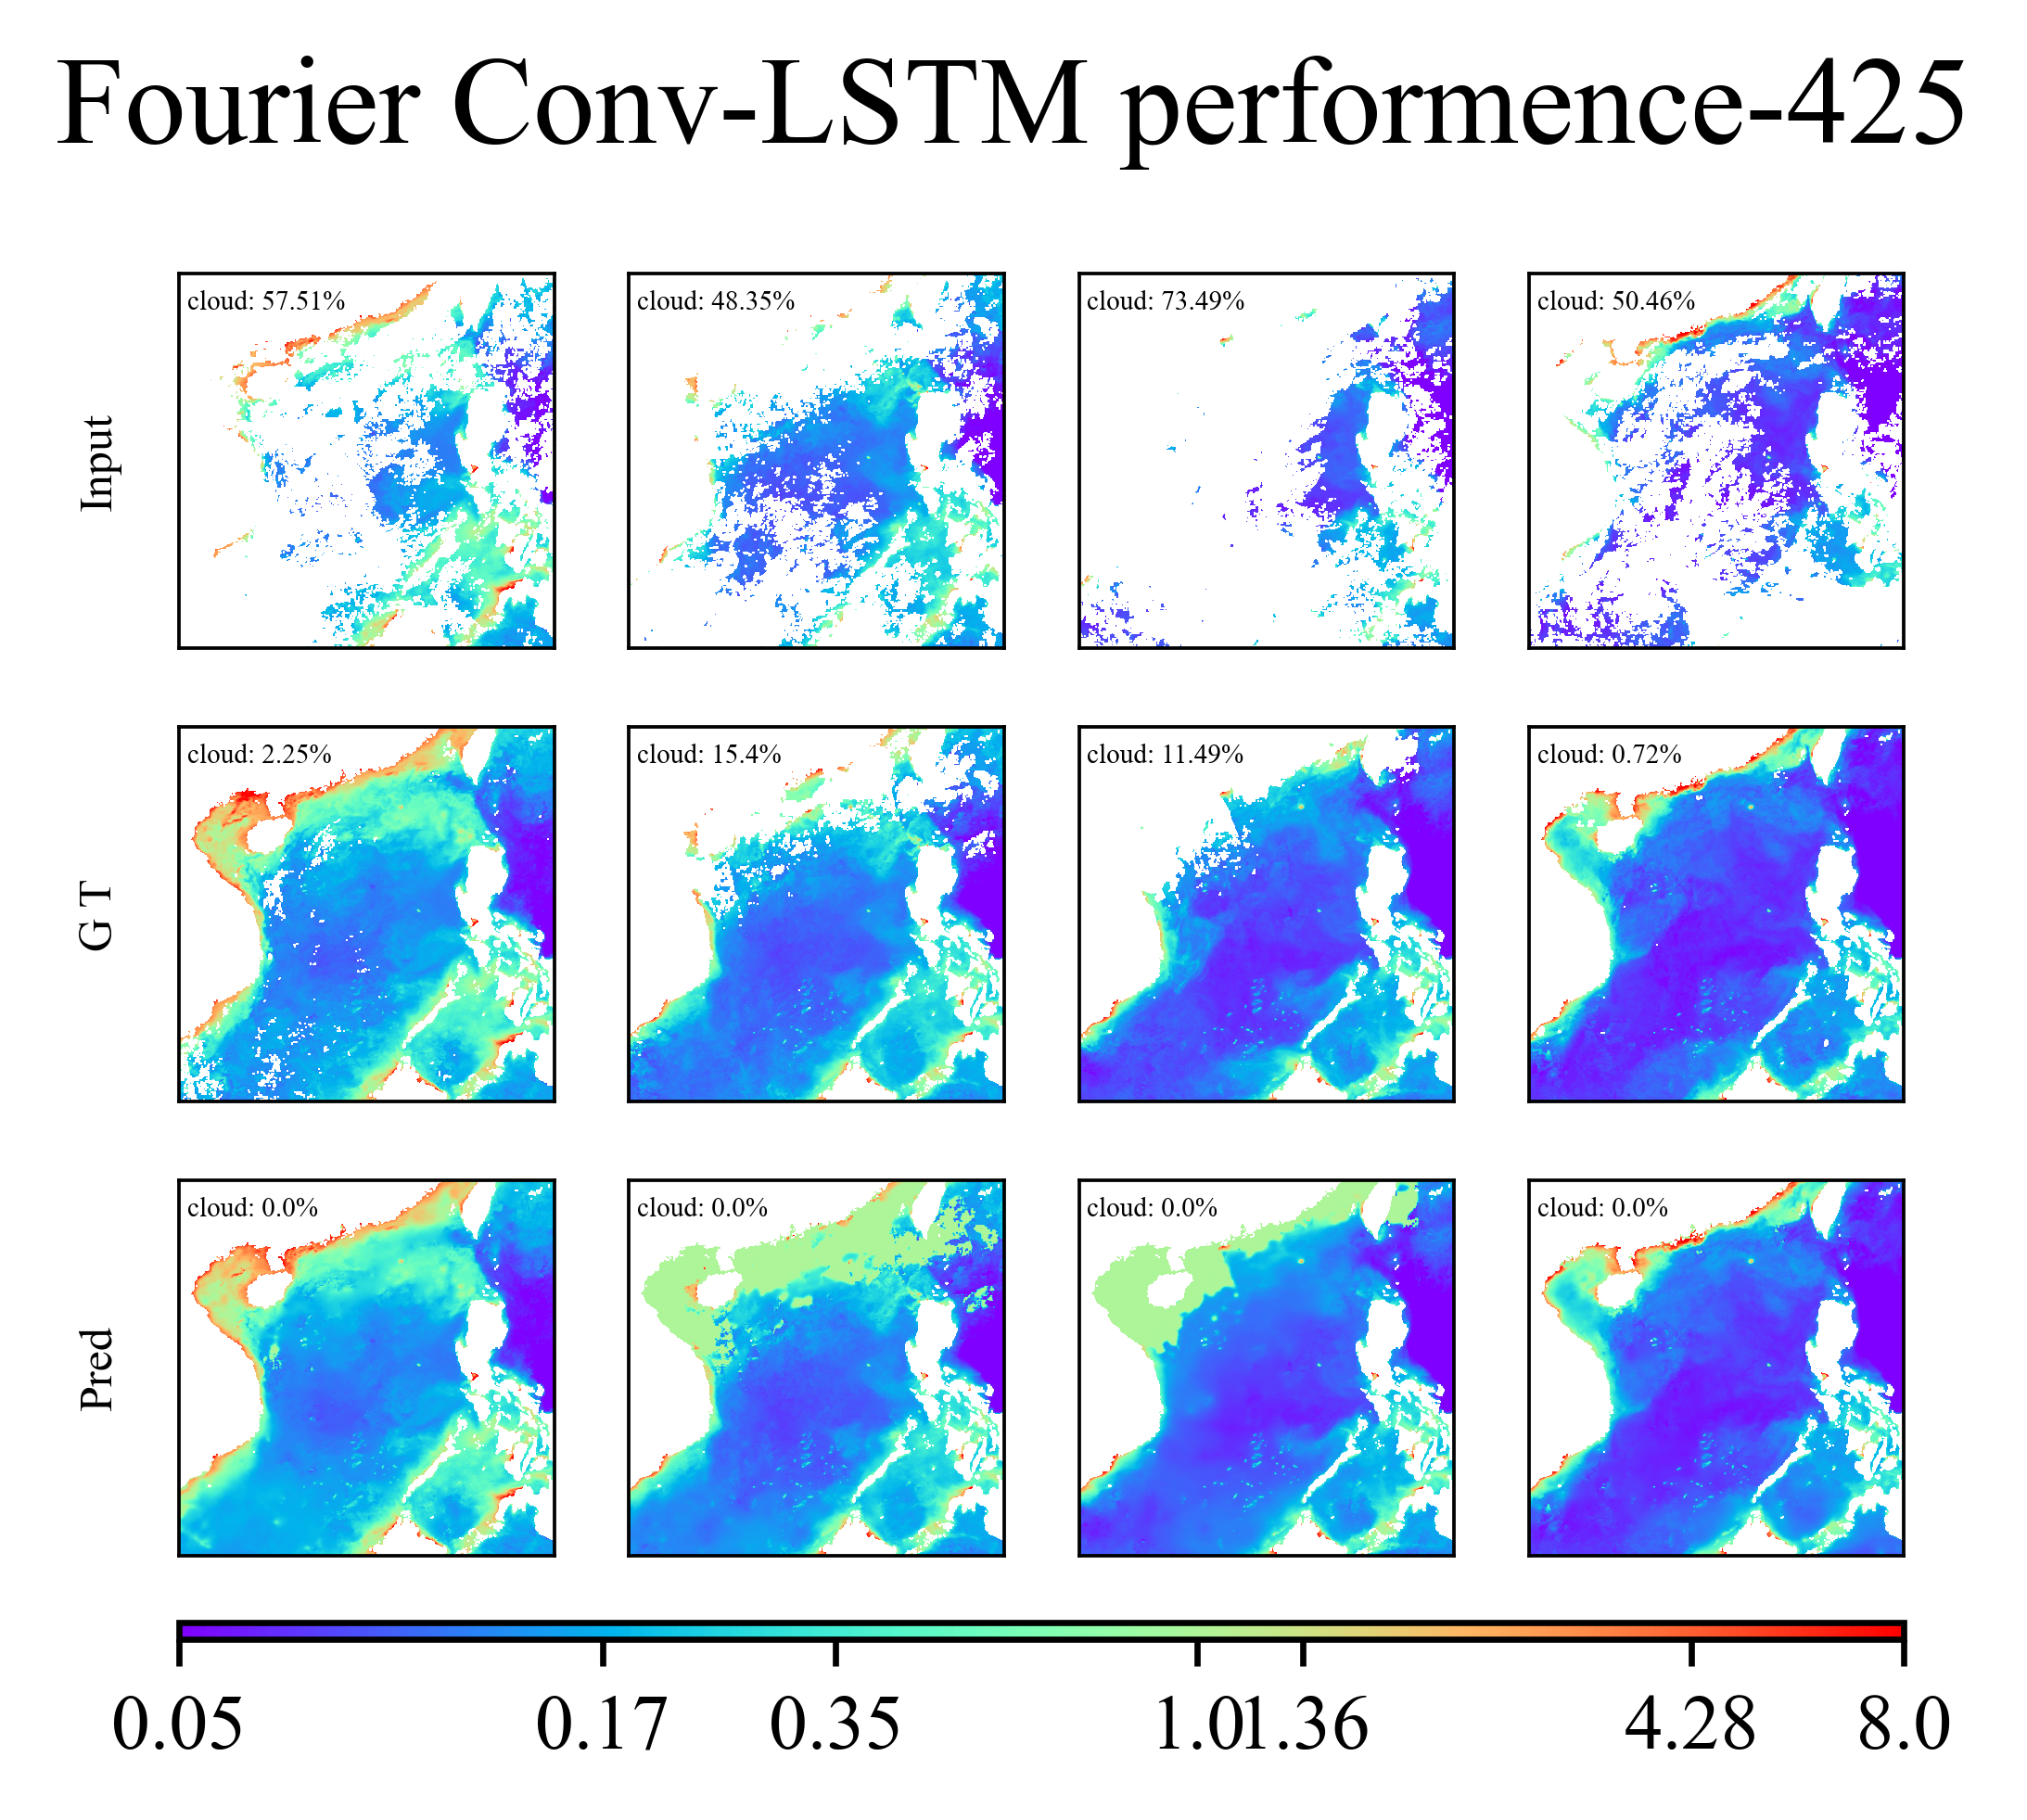

In [53]:
# 时序图像一张图
plt.rcParams["font.family"] = "times New Roman"
if train.ndim == 5:
     fig, ax = plt.subplots(3, 4, dpi=600, figsize=(4,3))
     for i in range(4):
         min = np.nanmax([np.nanmin(train[0,i,0]), np.nanmin(label[0,i,0]), np.nanmin(pred[0,i,0])])\
              + 0.5
         max = np.nanmin([np.nanmax(train[0,i,0]), np.nanmax(label[0,i,0]), np.nanmax(pred[0,i,0])])\
              - 0.5
         step_scale = (max - min)/100 
         cm = plt.get_cmap('rainbow')
         ticks = np.array([min, min+15*step_scale,0,min+30*step_scale,min+60*step_scale,min+85*step_scale,max], dtype=float)
         ticklabels = np.around(np.power(10, ticks), 2)
     
         ticks[0] = np.log10(0.05)
         ticks[-1] = np.log10(8)
     
         ticklabels[0] = 0.05
         ticklabels[-1] = 8
     
         min = np.log10(0.05)
         max = np.log10(8)
     
         im = ax[0,i].imshow(train[0,i,0],
                           vmin=min, vmax=max, 
                           cmap=cm)
         ax[0,i].set_xticks([])
         ax[0,i].set_yticks([])
         ax[0,i].text(10,45,f"cloud: {cal_cloud_mask(train[0,i,0],land_mask)}%", size=3.5)
     
         iL = ax[1,i].imshow(label[0,i,0],
                           vmin=min, vmax=max, 
                           cmap=cm)
         ax[1,i].set_xticks([])
         ax[1,i].set_yticks([])
         ax[1,i].text(10,45,f"cloud: {cal_cloud_mask(label[0,i,0],land_mask)}%", size=3.5)
     
         ip = ax[2,i].imshow(pred[0,i,0],
                                vmin=min, vmax=max, 
                                cmap=cm)
         ax[2,i].set_xticks([])
         ax[2,i].set_yticks([])
         ax[2,i].text(10,45,f"cloud: {cal_cloud_mask(pred[0,i,0],land_mask)}%", size=3.5)

     for w in range(4):
          for h in range(3):
               for axis in ["left","right","top","bottom"]:
                    ax[h,w].spines[axis].set_linewidth(0.45)

     ax[0,0].set_ylabel("Input", fontsize=6)
     ax[1,0].set_ylabel("G T", fontsize=6)
     ax[2,0].set_ylabel("Pred", fontsize=6)

     p0 = ax[2,0].get_position().get_points().flatten()
     p2 = ax[2,3].get_position().get_points().flatten()

     ax_cbar1 = fig.add_axes([p0[0],p0[1]-0.05, p2[2]-p0[0], 0.01])
     colorbar = plt.colorbar(im, cax=ax_cbar1, orientation='horizontal', 
                             ticks=ticks
                             )
     colorbar.ax.set_xticklabels(ticklabels)
     plt.suptitle(f'Fourier Conv-LSTM performence-{epoch}', y=1.01,fontsize=16)
     # plt.suptitle(f'Conv-LSTM performence-{epoch}', y=1.01,fontsize=16)
     plt.show()
else:
     fig, ax = plt.subplots(1, 3, dpi=600, figsize=(4,3))
     min = np.nanmax([np.nanmin(train), np.nanmin(label), np.nanmin(pred)])\
          + 0.5
     max = np.nanmin([np.nanmax(train), np.nanmax(label), np.nanmax(pred)])\
          - 0.5
     step_scale = (max - min)/100 
     cm = plt.get_cmap('rainbow')
     ticks = np.array([min, min+15*step_scale,0,min+30*step_scale,min+60*step_scale,min+85*step_scale,max], dtype=float)
     ticklabels = np.around(np.power(10, ticks), 2)

     ticks[0] = np.log10(0.05)
     ticks[-1] = np.log10(8)

     ticklabels[0] = 0.05
     ticklabels[-1] = 8

     min = np.log10(0.05)
     max = np.log10(8)

     im = ax[0].imshow(train,
                         vmin=min, vmax=max, 
                         cmap=cm)
     ax[0].set_xticks([])
     ax[0].set_yticks([])
     ax[0].text(10,45,f"cloud: {cal_cloud_mask(train,land_mask)}%", size=3.5)

     iL = ax[1].imshow(label,
                         vmin=min, vmax=max, 
                         cmap=cm)
     ax[1].set_xticks([])
     ax[1].set_yticks([])
     ax[1].text(10,45,f"cloud: {cal_cloud_mask(label,land_mask)}%", size=3.5)

     ip = ax[2].imshow(pred[0,-1,0],
                              vmin=min, vmax=max, 
                              cmap=cm)
     ax[2].set_xticks([])
     ax[2].set_yticks([])
     ax[2].text(10,45,f"cloud: {cal_cloud_mask(pred[0,-1,0],land_mask)}%", size=3.5)

     for h in range(3):
          for axis in ["left","right","top","bottom"]:
               ax[h].spines[axis].set_linewidth(0.45)

     ax[0].set_ylabel("Input", fontsize=6)
     ax[1].set_ylabel("G T", fontsize=6)
     ax[2].set_ylabel("Pred", fontsize=6)

     p0 = ax[0].get_position().get_points().flatten()
     p2 = ax[2].get_position().get_points().flatten()

     ax_cbar1 = fig.add_axes([p0[0],p0[1]-0.05, p2[2]-p0[0], 0.01])
     colorbar = plt.colorbar(im, cax=ax_cbar1, orientation='horizontal', 
                             ticks=ticks
                             )
     colorbar.ax.set_xticklabels(ticklabels)
     plt.suptitle(f'Fourier Conv-LSTM performence-{epoch}', y=1.01,fontsize=16)
     # plt.suptitle(f'Conv-LSTM performence-{epoch}', y=1.01,fontsize=16)
     plt.show()

In [ ]:
# 一张图自对比图
def reshape(image:np.ndarray):
    return image.reshape(-1)
fig, ax = plt.subplots(2, 5, dpi=600, figsize=(11,4))
for i in range(10):
    ax_w = i // 5
    ax_h = i % 5
    label_reshape = reshape(label[0,i,0])
    pred_reshape = reshape(pred[0,i,0])
    diff = np.absolute(label_reshape - pred_reshape)
    im = ax[ax_w, ax_h].scatter(label_reshape,pred_reshape,s=2.,c=diff,cmap='rainbow',vmin=0.0,vmax=1.5)

plt.suptitle(f'Flouier Conv-LSTM performence-{epoch}', y=1.001,fontsize=16)
plt.show();

In [ ]:
label_vstack = label.reshape(-1)
pred_vstack = pred.reshape(-1)
diff_vstack = np.absolute(label_vstack-pred_vstack)
plt.figure(dpi=600,figsize=(5,5))
plt.scatter(label_vstack,pred_vstack,s=2.,c=diff_vstack,cmap='rainbow',vmin=0.0,vmax=1.5)
plt.title(f'Flouier Conv-LSTM performence-{epoch}', y=1.001,fontsize=16)
plt.show();

In [ ]:
# log scale
for i in range(10):
    min = np.nanmax([np.nanmin(train[0,i,0]), np.nanmin(label[0,i,0]), np.nanmin(pred[0,i,0])])\
         + 0.5
    max = np.nanmin([np.nanmax(train[0,i,0]), np.nanmax(label[0,i,0]), np.nanmax(pred[0,i,0])])\
         - 0.5
    step_scale = (max - min)/100 
    cm = plt.get_cmap('rainbow')
    ticks = np.array([min, min+15*step_scale,0,min+30*step_scale,min+60*step_scale,min+85*step_scale,max], dtype=float)
    ticklabels = np.around(np.power(10, ticks), 2)
    
    fig, ax = plt.subplots(1, 3, dpi=300)
    im = ax.flat[0].imshow(train[0,i,0],
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax.flat[0].set_xticks([])
    ax.flat[0].set_yticks([])
    ax.flat[0].set_title("Input")
    ax.flat[0].text(10,30,f"cloud_ratio: {cal_cloud_mask(train[0,i,0],land_mask)}%", size=6)
    
    iL = ax.flat[1].imshow(label[0,i,0],
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax.flat[1].set_xticks([])
    ax.flat[1].set_yticks([])
    ax.flat[1].set_title("Ground Turth")
    ax.flat[1].text(10,30,f"cloud_ratio: {cal_cloud_mask(label[0,i,0],land_mask)}%", size=6)
    
    ip = ax.flat[2].imshow(pred[0,i,0],
                           vmin=min, vmax=max, 
                           cmap=cm)
    ax.flat[2].set_xticks([])
    ax.flat[2].set_yticks([])
    ax.flat[2].set_title("Prediction")
    ax.flat[2].text(10,30,f"cloud_ratio: {cal_cloud_mask(pred[0,i,0],land_mask)}%", size=6)
    plt.draw()
    p0 = ax[0].get_position().get_points().flatten()
    p1 = ax[1].get_position().get_points().flatten()
    p2 = ax[2].get_position().get_points().flatten()
    
    ax_cbar1 = fig.add_axes([p0[0],p0[1]-0.05, p2[2]-p0[0], 0.01])
    colorbar = plt.colorbar(im, cax=ax_cbar1, orientation='horizontal', 
                            ticks=ticks
                            )
    colorbar.ax.set_xticklabels(ticklabels)
    plt.show()

In [ ]:
# linear scale
for i in range(10):
    train_img = np.power(10, train[0, i, 0])
    label_img = np.power(10, label[0, i, 0])
    pred_img =  np.power(10, pred[0, i, 0])
    
    min = np.nanmax([np.nanmin(train_img), np.nanmin(label_img), np.nanmin(pred_img)])
    max = np.nanmin([np.nanmax(train_img), np.nanmax(label_img), np.nanmax(pred_img)])
    max = 100
    
    
    cm = plt.get_cmap('rainbow')
    cm.set_under('white')
    cm.set_over('white')
    ticks = np.array([min, 5, 10, 30, max], dtype=float)
    ticklabels = np.around(ticks, 2)
    
    fig, ax = plt.subplots(1, 3, dpi=300)
    ax.flat[0].imshow(train_img,
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax.flat[0].set_xticks([])
    ax.flat[0].set_yticks([])
    ax.flat[0].set_title("Input")
    ax.flat[0].text(10, 30, f"cloud_ratio: {cal_cloud_mask(train[0,i,0],land_mask)}%", size=6)
    
    ax.flat[1].imshow(label_img,
                      vmin=min, vmax=max, 
                      cmap=cm)
    ax.flat[1].set_xticks([])
    ax.flat[1].set_yticks([])
    ax.flat[1].set_title("Ground Turth")
    ax.flat[1].text(10, 30, f"cloud_ratio: {cal_cloud_mask(label[0,i,0],land_mask)}%", size=6)
    
    im = ax.flat[2].imshow(pred_img,
                           vmin=min, vmax=max, 
                           cmap=cm)
    ax.flat[2].set_xticks([])
    ax.flat[2].set_yticks([])
    ax.flat[2].set_title("Prediction")
    ax.flat[2].text(10, 30, f"cloud_ratio: {cal_cloud_mask(pred[0,i,0],land_mask)}%", size=6)
    
    plt.draw()
    p0 = ax[0].get_position().get_points().flatten()
    p1 = ax[1].get_position().get_points().flatten()
    p2 = ax[2].get_position().get_points().flatten()
    
    ax_cbar1 = fig.add_axes([p0[0],p0[1]-0.05, p2[2]-p0[0], 0.01])
    colorbar = plt.colorbar(im, cax=ax_cbar1, orientation='horizontal', 
                            ticks=ticks
                            )
    colorbar.ax.set_xticklabels(ticklabels)
    plt.show()

In [ ]:
mae_dir = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/stats/20230106-0141/mae_losses.txt"
mse_dir = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/stats/20230106-0141/mse_losses.txt"
ssmi_dir = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/stats/20230106-0141/ssmi_losses.txt"

def polyfit_array(x,y, times):
    z = np.polyfit(x,y,times)
    zpoly = np.poly1d(z)
    return zpoly(x)

f = open(mae_dir, "r")
mae = [float(i.replace("\n", "0")) for i in f.readlines()]
f = open(mse_dir, "r")
mse = [float(i.replace("\n", "0")) for i in f.readlines()]
f = open(ssmi_dir, "r")
ssmi = [float(i.replace("\n", "0")) for i in f.readlines()]

x = np.arange(0, len(ssmi),50)

mae_y = []
mse_y = []
ssmi_y = []

for i in x:
    mae_y.append(mae[i])
    mse_y.append(mse[i])
    ssmi_y.append(ssmi[i])

mae_y = np.array(mae_y)
mse_y = np.array(mse_y)
ssmi_y = np.array(ssmi_y)
rmse_y = np.square(mse_y)

plt.figure(
    figsize=(30,5),
           dpi=300)

plt.rcParams['font.sans-serif'] = ['SimSun']
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams['image.interpolation'] = 'nearest'

plt.plot(x, mae_y,  label="MAE",  linewidth=0.7, alpha=0.6, color="blue")
plt.plot(x, mse_y,  label="MSE",  linewidth=0.7, alpha=0.6, color="green")
plt.plot(x, rmse_y, label="RMSE", linewidth=0.7, alpha=0.6, color="red")
plt.plot(x, ssmi_y, label="SSMI", linewidth=0.7, alpha=0.6, color="orange")

# plt.plot(x, polyfit_array(x, mae_y,  10), linewidth=1, linestyle="--", color="blue")
# plt.plot(x, polyfit_array(x, mse_y,  10), linewidth=1, linestyle="--", color="green")
# plt.plot(x, polyfit_array(x, rmse_y, 10), linewidth=1, linestyle="--", color="red")
# plt.plot(x, polyfit_array(x, ssmi_y, 9), linewidth=1, linestyle="--", color="orange")

plt.grid(axis="x")

plt.xlabel("training steps")

plt.ylim((-0.01,1))
plt.xlim((0,30500))

plt.legend(loc="best")

plt.show()

In [ ]:
import yaml
from utils import draw_train_array
from utils import record_dir_setting_create
from torch.utils.data import DataLoader
yaml_dir = "/home/chensiyu/workspace/02_scientist_program/02_img_recovery/record/params/20221227.yml"
with open(yaml_dir, "r") as aml:
    yml_params = yaml.safe_load(aml)

EPOCH       = yml_params["EPOCH"]
BATCH       = yml_params["BATCH"]
LR          = yml_params["LR"]
frames      = yml_params["frames"]
shape_scale = yml_params["shape_scale"]

random_seed = yml_params["random_seed"]
root_dir    = yml_params["root_dir"]
mask_dir    = yml_params["mask_dir"]
is_month    = yml_params["is_month"]

device      = yml_params["device"]
ckpt_files  = yml_params["ckpt_files"]

save_dir    = record_dir_setting_create(yml_params["ckpts_dir"], yml_params["mark"])
stat_dir    = record_dir_setting_create(yml_params["stats_dir"], yml_params["mark"])
img_dir     = record_dir_setting_create(yml_params["img_dir"], yml_params["mark"])
log_dir     = record_dir_setting_create(yml_params["log_dir"], yml_params["mark"])
from dataset.chlora import ChloraData
trainFolder = ChloraData(root_dir, frames, shape_scale, is_month = is_month, mask_dir = mask_dir)
trainLoader = DataLoader(trainFolder, batch_size=BATCH, shuffle=False)

In [ ]:

for i, (index, inputs, targets, mask) in enumerate(trainLoader):
    
    X:torch.tensor = inputs
    x_numpy = X.numpy()
    plt.imshow(x_numpy[0,0,0])
    plt.colorbar()
    plt.title(f"max:{np.max(x_numpy[0,0,0])}, min:{np.min(x_numpy[0,0,0])}")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

# Create a scatter plot with density plot on top
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, color='gray')
# ax.contourf(x, y, cmap='plasma', alpha=0.5)

# Add a colorbar
cb = plt.colorbar()
cb.set_label('Density')

# Show the plot
plt.show()
